Initial Weights: [array([[0.01641135]], dtype=float32), array([-0.02351909], dtype=float32)]
Updated Weights: [array([[6.442845e-08]], dtype=float32), array([0.54999983], dtype=float32)]


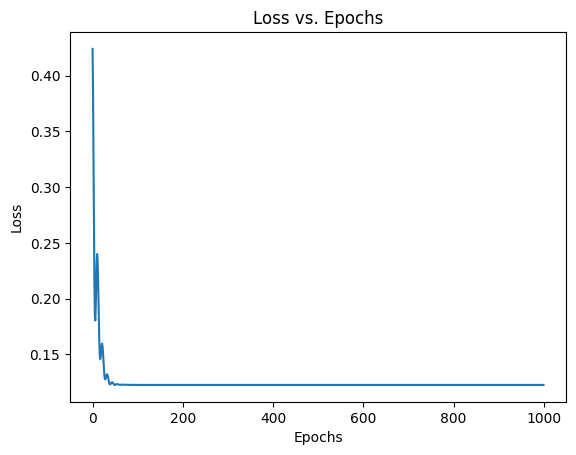

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=(1,), activation='linear', kernel_initializer='random_uniform', bias_initializer='random_uniform')
])

def calculate_loss(model, X, Y):
    predictions = model(X)
    loss = tf.reduce_mean(tf.square(predictions - Y))
    return loss

def momentum_optimizer(learning_rate, momentum):
    return tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)

def train(model, X, Y, epochs, learning_rate, momentum):
    optimizer = momentum_optimizer(learning_rate, momentum)
    losses = []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            current_loss = calculate_loss(model, X, Y)
        gradients = tape.gradient(current_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        losses.append(current_loss.numpy())

    return losses

initial_weights = model.get_weights()
print("Initial Weights:", initial_weights)

epochs = 1000
learning_rate = 0.01
momentum = 0.9

losses = train(model, X, Y, epochs, learning_rate, momentum)


updated_weights = model.get_weights()
print("Updated Weights:", updated_weights)

plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.show()
